# Intro.jl

By: John Muchovej

<div class="alert alert-danger">
    <h4> Fundamental assumptions </h4>
    <ul>
        <li> You've programmed in Python, R, or MATLAB. </li>
        <li>
            You're familiar with concepts in statistics, linear algebra, and
            machine learning.
        </li>
    </ul>
</div>

<div class="alert alert-info">
    <h4> Overview </h4>
    <p style="margin: 0;">
        This notebook is meant to be a whirlwind tour of Julia, contrasting it
        to Python, R, and MATLAB. Julia also has a 
        <a href="https://docs.julialang.org/en/v1/manual/getting-started/">
            phenomenal manual to help get you started as well
        </a>.
        
        We will also explore:
    </p>
    <ul style="margin: 0;">
        <li> plotting with <code>Plots.jl</code> and </li>
        <li> parallel computing with multi-threading/multi-processing. </li>
<!--         <li> data analysis with <code>DataFrames.jl</code>, and </li> -->
<!--         <li> machine learning <code>Flux.jl</code>. </li> -->
    </ul>
</div>

<hr style="border: solid 1px rgba(0, 0, 0, 0.2);" />

Julia is a relatively recent programming language[<sup id="b1">1</sup>](#f1)
tailored towards scientific and mathematical computing. Julia follows the
[**multiple dispatch**][md-wiki] programming paradigm[<sup id="b2">2</sup>](#f2).
Other notable features of Julia are:
- incedible speed (with **first-class parallel computing support**),
- first-class support for linear algebra,
- no classes (Julia uses `Struct`s but functions are not tied to them),
- **optional typing**[<sup id="b3">3</sup>](#f3), and
- broad Unicode support[<sup id="b4">4</sup>](#f4).

Julia draws inspiration from many languages, notably Python, R, MATLAB, Ruby,
C/C++, Common Lisp, and Dalton. The syntax is highly Python and Ruby inspired,
while the functional structure is very much inspired by R, MATLAB, and Common
Lisp.

1. [<span id="f1">[back]</span>](#b1) Julia was originally released in 2012 but
   only reached v1.0 in 2018.
1. [<span id="f2">[back]</span>](#b2) Briefly, multiple dispatch uses the _type_
   of the argument to infer _which_ function to call. This allows for many
   functions of the same name to be specified and to dynamically interact with
   varying datatypes. _We'll inspect this more deeply later._
1. [<span id="f3">[back]</span>](#b3) Optionally typed languages infer data
   types but still allow programmers to specify data types.
1. [<span id="f4">[back]</span>](#b4) This means that variables and
   expressions like `θ` and `3π` are valid Julia code (whereas the Python
   equivalents would be `theta` and `3 * math.pi`).

[md-wiki]: https://en.wikipedia.org/wiki/Multiple_dispatch

<hr style="border: solid 1px rgba(0, 0, 0, 0.2);" />

<div class="alert alert-warning">
    <h4> Usability tip! </h4>
    <p>
        When using Julia in a REPL-like (Read, Evaluate, Print Loop)
        environment, you can put a <code>;</code> to omit the last line's value.
    </p>
    <p>
        <em>The Julia console, Jupyter Notebooks, and <code>Pluto.jl</code>
        Notebooks are REPL-like environments.</em>
    </p>
</div>

## Variables, Types, &amp; Strictness

Much like Python, R, and MATLAB – Julia does not require you to specify a data
type when creating variables. Julia will infer the type on the fly.
Julia does not strictly type variables, allowing for on-the-fly reassignment.

Like Python (and unlike R and MATLAB), Julia derives all types from a base type.
In Python, this base type is `object` – in Julia it's `Any`.

In [1]:
blicket = true
println("$blicket is a(n) $(typeof(blicket))")
blicket = 79
println("$blicket is a(n) $(typeof(blicket))")

true is a(n) Bool
79 is a(n) Int64


As you can see above, we've set `blicket` to both a `Bool` and `Int64` datatype with no
complaints. Additionally, we've printed these values using Julia's `println` function.

If you're familiar with Python's "F-strings" (Python 3.7+), Julia will parse strings
similarly, trading `${value}` for `$value` when printing a variable and `$(value)`
when attempting to apply a function to `value` or access an attribute.

<div class="alert alert-info">
    <p> What's with this <code>&lt;blah&gt;64</code> funny business? </p>
    
    <blockquote>
        As with any programming language, we're constraint in represenation.
        Julia lets you know of the underlying representation (e.g. 64 for
        64-bits) explicitly. Depending on your data's range, you may grow or
        shrink these values by using the `convert` function.
    </blockquote>
</div>

In [2]:
# For instance, consider the following:
println(typeof(2 ^ 62), ", ", convert(Int128, 2 ^ 62))
println(typeof(24), ", ", convert(Float32, 24))
println(convert(Int8, 512))

Int64, 4611686018427387904
Int64, 24.0


LoadError: InexactError: trunc(Int8, 512)

The above code fails to convert `512` to an `Int8` because the numerical range
of 8-bit integers is `2 ^ 8 = 256` (and by-default integers are "signed"). This
means the smallest datatype to support `512` will be `Int16`.

[Here's a helpful table][ranges.jl] on the numerical ranges of `Int` and `Float`.

[ranges.jl]: https://docs.julialang.org/en/v1/manual/integers-and-floating-point-numbers/

On some occassions, you might also need to convert from `Float` to `Int`. While
Python, R, and MATLAB will handle just about any value nicely, Julia is a bit
pickier.

In [3]:
convert(Int64, 4.2)

LoadError: InexactError: Int64(4.2)

To allow for this, you should instead use the `trunc` function to "truncate" the
representation. Then you can proceed with type-conversion.

In [4]:
convert(Int64, trunc(4.2))

4

## Data Structures (Tuples, Dictionaries, Arrays, Slicing, and Broadcasting)

### Arrays (`Array`)

In Julia, Arrays come in 3 flavors, `Vector`, `Matrix`, and `Array`. Really, 
`Vector` and `Matrix` are [syntactic sugar][sugar] creating special cases of
`Array`. Like R and MATLAB, Julia is **column major**. This means that indexing
works across columns rather than rows (like Python).

The primary utility of column major representations is that linear algebra
programs implement the exact formulations specified mathematically. For
instance, consider 

$$A\vec{x} = b$$

In Julia, R, and MATLAB you would write something like `A * x` to get `b`,
whereas Python would require you to write something like `transpose(A) * x`.

[sugar]: https://en.wikipedia.org/wiki/Syntactic_sugar

More on the difference between `Array` and `Vector`,
[from StackOverflow][array-vector.so].

[array-vector.so]: https://stackoverflow.com/questions/61171531/difference-between-array-and-vector

In [5]:
a = [1, 2, 3, 4]

4-element Vector{Int64}:
 1
 2
 3
 4

In [6]:
b = Array{Int64, 1}([1, 2, 3, 4])

4-element Vector{Int64}:
 1
 2
 3
 4

In [7]:
a == b

true

To create a matrix, we can use an "enumerative" approach where each row is
space-delimited and columns are semicolon-delimited. We can also use sequences
and Julia's `reshape` function to achieve similar results (the "functional"
approach).

**Consider Line 1:** This is the "enumerative" approach.

**Consider Line 2:** Here we use the `reshape(<sequence>, (<shape>))` function
to create a 3x3 `Matrix`.

In [8]:
A = [1 2 3; 4 5 6; 7 8 9]
display(A)
A = reshape(1:9, (3, 3))
display(A)

3×3 Matrix{Int64}:
 1  2  3
 4  5  6
 7  8  9

3×3 reshape(::UnitRange{Int64}, 3, 3) with eltype Int64:
 1  4  7
 2  5  8
 3  6  9

Notice, though, we have different signatures when using the enumerative and
"functional" approaches. We can coherence the functional approach by using
`collect`, which expands generative sequences into vectors.

In [9]:
A = reshape(collect(1:9), (3, 3))

3×3 Matrix{Int64}:
 1  4  7
 2  5  8
 3  6  9

In [10]:
x = [1, 2, 3]

3-element Vector{Int64}:
 1
 2
 3

In [11]:
b = A * x

3-element Vector{Int64}:
 30
 36
 42

#### Indexing &amp; Slicing

Sometimes you want to retrieve a subset of an `Array`. Like Python, R, and
MATLAB, Julia supports `slicing`. However, Julia mimics MATLAB in indexing (we
start counting from `1` instead of `0`). Further, Julia takes inspiration from
Python's negative indexing, however we must use the `end` keyword.

In [12]:
B = reshape(collect(1:64), (4, 4, 4))

4×4×4 Array{Int64, 3}:
[:, :, 1] =
 1  5   9  13
 2  6  10  14
 3  7  11  15
 4  8  12  16

[:, :, 2] =
 17  21  25  29
 18  22  26  30
 19  23  27  31
 20  24  28  32

[:, :, 3] =
 33  37  41  45
 34  38  42  46
 35  39  43  47
 36  40  44  48

[:, :, 4] =
 49  53  57  61
 50  54  58  62
 51  55  59  63
 52  56  60  64

In [13]:
B[24]

24

While Python supports access like `array[1:]` and `array[-1]`, Julia requires
you to write `end` in each. This ends up implemented as:

In [14]:
B[:, :, end]

4×4 Matrix{Int64}:
 49  53  57  61
 50  54  58  62
 51  55  59  63
 52  56  60  64

In [15]:
B[:, :, 2:end]

4×4×3 Array{Int64, 3}:
[:, :, 1] =
 17  21  25  29
 18  22  26  30
 19  23  27  31
 20  24  28  32

[:, :, 2] =
 33  37  41  45
 34  38  42  46
 35  39  43  47
 36  40  44  48

[:, :, 3] =
 49  53  57  61
 50  54  58  62
 51  55  59  63
 52  56  60  64

Of course, you could also write `B[:, :, 2:size(B)[3]]`, but that becomes
quite cumbersome to mentally parse, compared to `end`.

Additionally, you can treat `end` as a variable, performing arithmetic on it.

In [16]:
B[:, :, end - 2:end]

4×4×3 Array{Int64, 3}:
[:, :, 1] =
 17  21  25  29
 18  22  26  30
 19  23  27  31
 20  24  28  32

[:, :, 2] =
 33  37  41  45
 34  38  42  46
 35  39  43  47
 36  40  44  48

[:, :, 3] =
 49  53  57  61
 50  54  58  62
 51  55  59  63
 52  56  60  64

##### Aside: Julia's indexing quirks

**Consider Line 1:** `64` is clearly out-of-bounds of `A`'s 4x4x4 shape, but Julia
accepts this index because it is still within bounds of the vector
representation.

**Consider Line 2:** Julia raises a `BoundsError` because `65 > 64` which is the
size of `A`'s vector representation.

In [17]:
println(B[64])
println(B[65])

64


LoadError: BoundsError: attempt to access 4×4×4 Array{Int64, 3} at index [65]

Unlike Python's `numpy`, though, you must specify all axes you wish to select
from, otherwise Julia will retrieve that single value.

In [18]:
B[:, 1, :]

4×4 Matrix{Int64}:
 1  17  33  49
 2  18  34  50
 3  19  35  51
 4  20  36  52

Recall that Julia is column major (like R and MATLAB), so this means the above
indexing will extract the first column of each `Matrix` rather than the first
row as you would expect in Python (and many other programming languages).

If, instead of the first column, we want a 2x2 chunk of each `Matrix`, we can
use slicing to achieve this.

In [19]:
B[2:3, 2:3, :]

2×2×4 Array{Int64, 3}:
[:, :, 1] =
 6  10
 7  11

[:, :, 2] =
 22  26
 23  27

[:, :, 3] =
 38  42
 39  43

[:, :, 4] =
 54  58
 55  59

Like R and MATLAB (and unlike Python), Julia's range bounds include the
upper-bound.

#### Broadcasting

Broadcasting allows for element-wise operations. This is both a usability and performance optimization because it sidesteps the need to ensure `Array`s match along all dimensions when doing unary operations (e.g. `*`, `+`).

In [20]:
A + x

LoadError: DimensionMismatch("dimensions must match: a has dims (Base.OneTo(3), Base.OneTo(3)), must have singleton at dim 2")

In [21]:
A .+ x

3×3 Matrix{Int64}:
 2  5   8
 4  7  10
 6  9  12

In [22]:
A * x

3-element Vector{Int64}:
 30
 36
 42

In [23]:
A .* x

3×3 Matrix{Int64}:
 1   4   7
 4  10  16
 9  18  27

In [24]:
A / x

LoadError: DimensionMismatch("Both inputs should have the same number of columns")

In [25]:
A ./ x

3×3 Matrix{Float64}:
 1.0  4.0  7.0
 1.0  2.5  4.0
 1.0  2.0  3.0

In [26]:
A .% x

3×3 Matrix{Int64}:
 0  0  0
 0  1  0
 0  0  0

In [27]:
A .^ x

3×3 Matrix{Int64}:
  1    4    7
  4   25   64
 27  216  729

### Tuples (`Tuple`)

Like Python and R, Tuples are immutable sequences. Like Python's
`collections.namedtuple`, you may also create named tuples in Julia.

In [28]:
unnamedtuple = (7, 42, 252)

(7, 42, 252)

In [29]:
namedtuple = (a=7, b=42, c=252)

(a = 7, b = 42, c = 252)

Accessing tuples is just like accessing arrays, using the 1-based index of the
sequence.

In [30]:
unnamedtuple[1]

7

However, named Tuples may be accessed using the index _or_ the name of the
index (key).

In [31]:
namedtuple[1]

7

In [32]:
namedtuple.a

7

In [33]:
namedtuple[:a]

7

### Dictionaries (`Dict`)

Like Python (`dict`), R (`names(v)`), MATLAB (`containers.Map`) – Julia has a
`Dict` data structure that allows for storing data with keys that don't quite
fit the intent of Arrays.

However, borrowing from LISP and Ruby, Julia supports `Symbol`s. Symbols are
created using colons (`:`). `Symbol`s are actually use in
[metaprogramming][meta.jl], however, our uses for `Symbol`s will be restricted
to `Dict` keys (along with other possibilities).

[meta.jl]: https://docs.julialang.org/en/v1/manual/metaprogramming/

For more on metaprogramming, [inspect the Wikipedia article here][meta.wiki].
More on the use of `Symbol`s, [from StackOverflow][meta.so].

[meta.wiki]: https://en.wikipedia.org/wiki/Metaprogramming
[meta.so]: https://stackoverflow.com/questions/23480722/what-is-a-symbol-in-julia

In [34]:
d = Dict(
    "key" => 42,
    :key => 12,
)

Dict{Any, Int64} with 2 entries:
  "key" => 42
  :key  => 12

In [35]:
d[:sym] = 2.0
println(d)

Dict{Any, Int64}("key" => 42, :key => 12, :sym => 2)


<div class="alert alert-danger">
    <p>What happened to <code>2.0</code>???</p>
    
    <blockquote>
        Julia only accepted <code>2.0</code> because it could
        <code>convert</code> while retaining accuracy.
    </blockquote>
</div>

In [36]:
d["sym"] = 2.2

LoadError: InexactError: Int64(2.2)

However, we can specify the data type when creating a `Dict` to avoid these
errors.

<div class="alert alert-warning">
    <h4>Performance tip!</h4>
    <p> 
        While using <code>Any</code> is great for programmer UX, you'll pay the
        price in performance and when attempting to leverage multiple dispatch.
    </p>
</div>

In [37]:
dict = Dict{Any, Any}(
    :key => 12,
    "key" => 42,
    :sym => 2.0,
    "sym" => 2.2
)

Dict{Any, Any} with 4 entries:
  "key" => 42
  :key  => 12
  :sym  => 2.0
  "sym" => 2.2

**Aside:** You can nest `Dict`s (infinitely). However, you might want to
consider using alternate representations like `Struct`s. (For those familiar
with object-oriented programming, these are like classes without the methods.)

In [38]:
dict[:d] = d

Dict{Any, Int64} with 3 entries:
  "key" => 42
  :key  => 12
  :sym  => 2

In [39]:
dict

Dict{Any, Any} with 5 entries:
  "key" => 42
  :key  => 12
  :d    => Dict{Any, Int64}("key"=>42, :key=>12, :sym=>2)
  :sym  => 2.0
  "sym" => 2.2

## Functions

In most cases, when you find yourself repeating code, it's ideal to construct
functions. Defining functions is largely inspired by Ruby's syntax, but 
optionally supports type annotations as well (this is **imperitive for multiple
dispatch**).

### Void Functions

In [40]:
function sayhi()
    println("Hello, from Intro.jl!")
end

sayhi (generic function with 1 method)

In [41]:
sayhi()

Hello, from Intro.jl!


The above is a **void function**, which is a function that takes no arguments
and returns no values.

### Positional Arguments

As you know, positional arguments must be provided in an expected order. Failure
to do so will yield incorrect results (or even break the function).

In [42]:
function f(x)
    return sin(x)
end

f (generic function with 1 method)

In [43]:
f(1)

0.8414709848078965

In [44]:
f([1, 2, 3])

LoadError: MethodError: no method matching sin(::Vector{Int64})
Closest candidates are:
  sin(!Matched::Float16) at math.jl:1159
  sin(!Matched::ComplexF16) at math.jl:1160
  sin(!Matched::Complex{T}) where T at complex.jl:831
  ...

In [45]:
function f(x::Vector)
    return sin.(x)
end

f (generic function with 2 methods)

In [46]:
f([1, 2, 3])

3-element Vector{Float64}:
 0.8414709848078965
 0.9092974268256817
 0.1411200080598672

### Keyword Arguments

Just like Python, R, and MATLAB – you can provide named arguments to Julia
functions. However, unlike Python, named arguments cannot be inferred from
positional arguments.

In [47]:
function somekeyword(; key, word)
    println(key, " & ", word)
    return nothing
end

somekeyword (generic function with 1 method)

In [48]:
somekeyword("key", "word")

LoadError: MethodError: no method matching somekeyword(::String, ::String)

In [49]:
somekeyword(key="key", word="word")

key & word


### Combining Positional &amp; Keyword Arguments

In [50]:
function magical(x; food)
    n = rand(1:x)
    return "$n $food"
end

magical (generic function with 1 method)

In [51]:
magical(3, "bean(s)")

LoadError: MethodError: no method matching magical(::Int64, ::String)
Closest candidates are:
  magical(::Any; food) at In[50]:1

In [52]:
magical(3, food="bean(s)")

"3 bean(s)"

In [53]:
magical(3; food="bean(s)")

"3 bean(s)"

### Default Arguments

As with Python, R, and MATLAB – Julia supports default argument values. This
applies for both positional and keyword arguments.

In [54]:
function withdefaults(x, y=4; u, v=[1, 2, 3])
    println(x * y, " || ", u .* v)
end

withdefaults (generic function with 2 methods)

In [55]:
withdefaults(4; u=collect(3:-1:1))

16 || [3, 4, 3]


### Iteration Utilities

Julia supports a wide range of iteration utilities that allow us to side-step
writing our of `for` loops. This is useful because Julia's core libraries are
highly optimized to use these iteration tools, whereas `for` loops can be harder
for the Julia compiler to analyze (and, thus, optimize).

In [56]:
# Let's create a Vector for use in the following examples
v = collect(1:64)
reshape(v, (4, 16))  # for viewing simplicity

4×16 Matrix{Int64}:
 1  5   9  13  17  21  25  29  33  37  41  45  49  53  57  61
 2  6  10  14  18  22  26  30  34  38  42  46  50  54  58  62
 3  7  11  15  19  23  27  31  35  39  43  47  51  55  59  63
 4  8  12  16  20  24  28  32  36  40  44  48  52  56  60  64

`filter`'s type signature is the following `filter(f, ls)` where `f` is some
function that returns a `Bool` (indicating `true`/`false`). These `Bool` values
are used to extract only the values in `ls` which pass the conditions of `f`.

In [57]:
v_evens = filter(iseven, v)  # Julia supports `isodd`, as well
reshape(v_evens, (4, 8))

4×8 Matrix{Int64}:
 2  10  18  26  34  42  50  58
 4  12  20  28  36  44  52  60
 6  14  22  30  38  46  54  62
 8  16  24  32  40  48  56  64

#### Aside: Anonymous functions
Say we don't want to make a named function, but do want to apply a function
over some data. Julia supports this, just like Python and
R[<sup id="ffb1">1</sup>](#ff1).

1. [<span id="ff1">[back]</span>](#ffb1) Technically MATLAB supports "anonymous"
   functions, but they're still named, whereas Python, R, and Julia support
   truly unnamed functions.

In [58]:
v_gt4_lt12 = filter((x) -> 4 < x && x < 12, v)

7-element Vector{Int64}:
  5
  6
  7
  8
  9
 10
 11

Julia has a `do` "operator". ;-)

In [59]:
v_sqdiff = map(v) do x
    y = x ^ 2
    return y - x
end
reshape(v_sqdiff, (4, 16))

4×16 Matrix{Int64}:
  0  20   72  156  272  420  600  812  …  1640  1980  2352  2756  3192  3660
  2  30   90  182  306  462  650  870     1722  2070  2450  2862  3306  3782
  6  42  110  210  342  506  702  930     1806  2162  2550  2970  3422  3906
 12  56  132  240  380  552  756  992     1892  2256  2652  3080  3540  4032

The elipses above denote that you have data but the line is too long to show, so
Julia will show you the beginning and end of a given row (in this case).

In [60]:
# The above is a contrived example of the `map(...) do arg1, arg2, ...` syntax
v_sqdiff2 = v .^ 2 - v
reshape(v_sqdiff2, (4, 16))

4×16 Matrix{Int64}:
  0  20   72  156  272  420  600  812  …  1640  1980  2352  2756  3192  3660
  2  30   90  182  306  462  650  870     1722  2070  2450  2862  3306  3782
  6  42  110  210  342  506  702  930     1806  2162  2550  2970  3422  3906
 12  56  132  240  380  552  756  992     1892  2256  2652  3080  3540  4032

In [61]:
for idx in eachindex(A)
    print("$(A[idx])? ")
    if A[idx] > 5
        print("Too much! ")
    elseif A[idx] < 5
        print("Too little... ")
    else
        print("Just right. ")
    end
    if idx != length(A)
        print("| ")
    end
end

1? Too little... | 2? Too little... | 3? Too little... | 4? Too little... | 5? Just right. | 6? Too much! | 7? Too much! | 8? Too much! | 9? Too much! 

## Multiple Dispatch

Programming languages are often designed around a particular paradigm, with
other paradigms being achieved, but likely second-class citizens.

For instance: Python, R, and MATLAB are all "multi-paradigm", but primarily
- Python follows the object-oriented paradigm
- R follows the array-oriented paradigm
- MATLAB follows the functional paradigm

In these paradigms, you cannot have multiple functions of the same name, but
with different argument types. (Instead, you often have to write unique or
wrapper functions to handle this.) The **multiple dispatch** paradigm allows for
function resolution based on the argument's types.

While this might make you a little type-happy, [Julia recommends specifying the
most generic types as possible][types.jl].

[types.jl]: https://docs.julialang.org/en/v1/manual/style-guide/#Avoid-writing-overly-specific-types

In [62]:
abstract type Human
end
mutable struct Adult <: Human
    name::String
end
mutable struct Teen <: Human
    name::String
end
mutable struct Child <: Human
    name::String
end
mutable struct Baby <: Human
    name::String
end


function encounter(human1::Human, human2::Human)
    interaction = interacts(human1, human2)
    # This snippet tells us which "interacts" is being called
    display(@which interacts(human1, human2))
    println("$(human1.name) $interaction $(human2.name)")
end

interacts(h1::Human, h2::Human) = "waves at"
interacts(h1::Adult, h2::Child) = "plays with"
interacts(h1::Child, h2::Adult) = "plays with"
interacts(h1::Adult, h2::Teen)  = "disciplines"
interacts(h1::Teen,  h2::Adult) = "rebels against"

interacts (generic function with 5 methods)

In [63]:
encounter(Adult("Bob"), Adult("Alice"))

interacts(h1::Human, h2::Human) in Main at In[62]:24

Bob waves at Alice


In [64]:
@which interacts(Adult("Alice"), Child("Eve"))
encounter(Adult("Alice"), Child("Eve"))

interacts(h1::Adult, h2::Child) in Main at In[62]:25

Alice plays with Eve


---
<span id="plotting"></span>
## Plotting with `Plots.jl`

Coming from Python, you might be familiar with `plotly` or `matplotlib`.
Likewise, coming from R you might be familiar with `ggplot2` (or `plotly`). (And
of course, MATLAB's internal plotting library, which `matplotlib` is based on.)

Julia has a myriad of similar plotting libraries, but we'll use the `Plots.jl`
"metapackage" to switch between multiple plotting "backends" (libraries
`Plots.jl` interfaces with). As a metapackage, `Plots.jl` provides a relatively
unified interface to each interface with a function call being the only
requirement to switch between backends.

For a succinct comparison, take a look at the [`Plots.jl` docs][plots.jl].

[plots.jl]: https://docs.juliaplots.org/latest/backends/

In [65]:
using Plots

In [66]:
# By default, Plots.jl will use GR as the plotting backend.
# gr()
pyplot()
# plotly()

Plots.PyPlotBackend()

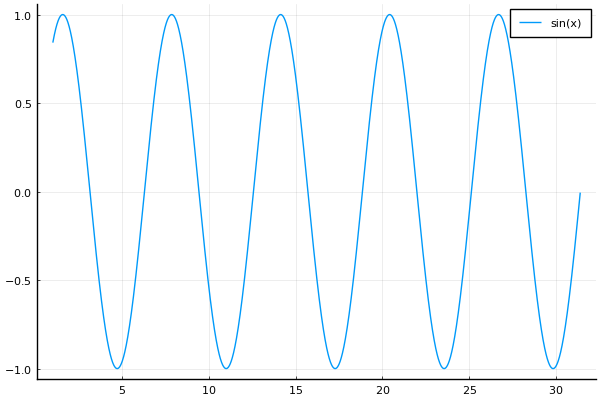

In [67]:
x = 1:0.01:10π
y = sin.(x)

plot(x, y, label="sin(x)")

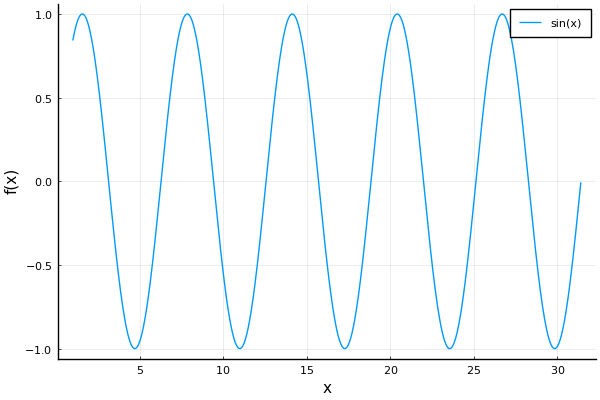

In [68]:
plot!(xlab="x", ylab="f(x)")

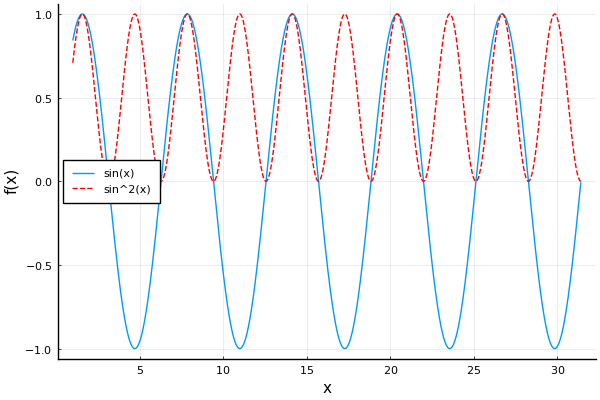

In [69]:
y = sin.(x).^2

plot!(x, y, label="sin^2(x)", color=:red, line=:dash)

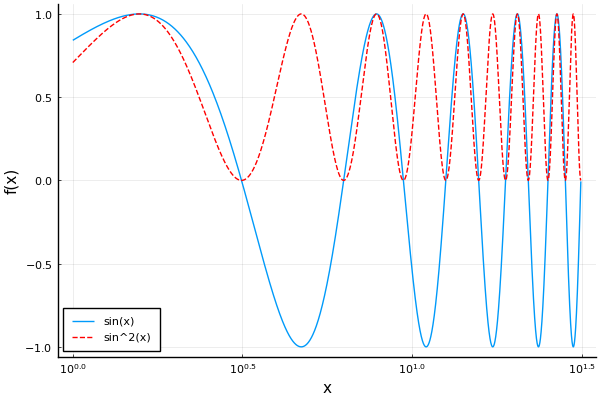

In [70]:
xaxis!(:log10)
plot!(legend=:bottomleft)

In [71]:
savefig("sin.png")

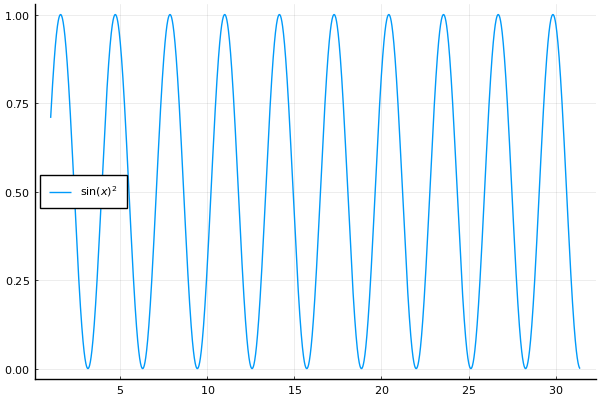

In [72]:
using LaTeXStrings
plot(x, y, label=L"$\sin(x)^2$")

In [73]:
plotly()

x = -10:0.2:10
y = -10:0.2:10

xx = repeat(transpose(x), length(y))
yy = repeat(y, outer=[1, length(x)])

# zz = √((xx .^ 2) .+ (yy .^ 2))
zz = (xx .^ 2) .+ (yy .^ 2)
# println(zz)
zz = .√zz
# println(zz)
zz = sin.(zz) ./ (zz .+ eps(Float64))  # eps to sidestep Division Error

plot3d(xx, yy, zz, label=:none, st=:surface)
plot!(xlab="x", ylab="y", zlab="sin(x) * cos(y)")

<!DOCTYPE html>
 
 
 Plots.jl

---
<span id="parallel"></span>
## Parallel computing with multi-threading/multi-processing

Julia is one of few programming languages made with distributed 
computing[<sup id="ffpb1">1</sup>](#ffp1) in mind. In Julia, multi-threading is
a first-class citizen and it relatively easy to implement.

However, as Julia has nothing like Python's GIL[<sup id="ffpb2">2</sup>](#ffp2),
this makes multi-threading possible (along with, of course, multi-processing).

1. [<span id="ffp1">[back]</span>](#ffpb1) Distributed computing refers to
   multi-threading and multi-processing. Most programming languages use a single
   process for execution (as they were written in the days where single-core
   computing was most common). Functionally, this translates to: even if you
   have a 4-core/8-thread computer, your code will only use 1-core, at most.
1. [<span id="ffp2">[back]</span>](#ffpb2) The "Global Interpreter Lock".
   Essentially, the GIL prevents multiple threads from running concurrently
   (unless using "thread safe" data structures). This can be side-stepped by
   using multiple _processes_.
   
   
#### Aside: What the diff? Multi-threading vs Multi-processing

Broadly, programs may be executed as processes or threads.
- **Threads are lightweight**. You can launch infinite threads, though your
  processor will only ever run the number of threads equal to your CPU's
  "thread" count. However, _all Threads share the same memory space_, so you
  must be careful when modifying values. This requires the use of
  [**synchronization** methods][thread-sync.jl]. **A major drawback of Threads
  is that they must be _on the same physical machine_.**
- **Processes are great for distributed computing.** This allows for running
  our functions on a compute cluster (e.g. a super computer), or on our own
  computers. Unlike Threads, Processes have their own memory space, thus don't
  require synchronization like Threads do. Though Processes are isolated from
  one another, we can still share data between them using various communication
  methods.

<div class="alert alert-warning">
    <h4> Usability &amp; Performance Tip! </h4>
    <p> 
        While <code>Threads</code> are more resource efficient (at the cost of
        more maintenance), I recommend using <code>Processes</code> because
        debugging parallelized workloads can quickly turn into a debugging
        nightmare.
    </p>
    <p>
        <strong>
            This strictly applies for research workloads. Production
            workloads should strive to minimize resource utilization across the
            board.
        </strong>
    </p>
</div>

[thread-sync.jl]: https://docs.julialang.org/en/v1/base/multi-threading/#Synchronization

You can inspect the number of threads your container has access to. (This is
more important to workloads outside of this tutorial.)

In [74]:
import Base.Threads

println(ENV["JULIA_NUM_THREADS"])
println(Threads.nthreads())

14
14


In [75]:
# using Pkg; Pkg.Add("BenchmarkTools")
using BenchmarkTools

### Threading

We can spawn Threads in Julia using the `@threads` macro or `@spawn` macro.

The `@threads` macro allows us to dispatch multiple function calls to different
threads. This is extremely useful when we have multiple values to compute over.

However, we might also have cases with recursive functions (or similar), where 
multiple long-running function calls could be made, to allow these to make use
of threads, we can use the `@spawn` macro. 

**Aside:** Macros are prefixed by `@`.

To illustrate this, let's use the naïve solution to computing the `nth`
Fibonacci number.

In [76]:
import Base.Threads

function fib(n::Int)
    if n < 2
        return n
    end
    n_2 = fib(n - 2)
    return fib(n - 1) + n_2
end

function fibwiththreads(n::Int)
    if n < 2
        return n
    end
    n_2 = Threads.@spawn fibwiththreads(n - 2)
    n_1 = Threads.@spawn fibwiththreads(n - 1)
    return fetch(n_1) + fetch(n_2)
end
;

In [77]:
n_fib = 24
;

In [ ]:
@btime fib(n_fib)

In [ ]:
@btime fibwiththreads(n_fib)

Entertainingly, you'll note that spawning as many threads as we do with
`fubwiththreads` actually runs more slowly that running plain `fib`. This
largely has to do with the overhead in spawning `Threads` __and__ with how
simple our computations are.

If, for instance, we were solving MDPs using Value Iteration, we would see that
using `Threads` would greatly improve performance.

**An example using `@threads`.**

In [ ]:
@btime let
    fibs = collect(1:n_fib)
    Threads.@threads for n = fibs
        fibs[n] = fib(n)
    end
    transpose(reshape(fibs, (6, 4)))
end

### Multi-processing

Multi-processing in Julia is accomplished using the
[`Distributed` module of the standard library][distributed.jl].

Like we discussed earlier, multi-processing is like mutlti-threading in terms of
"distribute a workload across many compute cores", but different in how it does
so.

The `Distributed` module closely follows the syntax of `Threads` with functions
like `fetch` and macros like `@spawn` acting in approximately the same way.

[distributed.jl]: https://docs.julialang.org/en/v1/stdlib/Distributed/

In [ ]:
import Distributed
Distributed.addprocs(Threads.nthreads())

In [ ]:
display(fetch(Distributed.@spawn Distributed.myid()))
display(fetch(Distributed.@spawnat 3 Distributed.myid()))

Let's try writing a simple function to distribute across all our Processes.

In [ ]:
function magicsin(x)
    sleep(rand())
    return x^3 * cos(x)
end

@btime Distributed.fetch(Distributed.@spawnat 3 magicsin(0.84))

Recall that every Process runs in isolation from other Processes. Thankfully,
`Distributed` provides a macro to ensure resources are accessible by every
Process. To do this, we use `Distributed.@everywhere` load our code in manner
accessible by all `Distributed` processes.

In [ ]:
Distributed.@everywhere function magicsin(x)
    sleep(rand())
    return x^3 * cos(x)
end

@btime Distributed.fetch(Distributed.@spawnat 3 magicsin(0.84))

Let's consider the case where we want to perform some computation across
multiple processes but collect the results into a single location (like a
`Vector` or a `Matrix`).

In [ ]:
Distributed.@everywhere using SharedArrays
n_results = 36
results_shape(s) = (
    convert(Int64, √s |> floor |> trunc),
    convert(Int64, √s |> round |> trunc),
)

@btime let
    # Create an Array that all processes can access.
    #   NOTE: Careful here! Because all processes can access `results`, you must take care
    #     to ensure that you don't unintentionally overwrite results.
    results = SharedArray(zeros(n_results))

    Distributed.@distributed for x in 1:n_results
        results[x] = magicsin(x)
    end

    reshape(results, results_shape(n_results))
end

`Distributed.@distributed` is pretty awesome, but let's consider a case where
some computations take longer to execute than others. Since
`Distributed.@distributed` doesn't perform "load balancing", this means if a
Process was assigned two values that lead to lots of computation, they'll
bottleneck the parallelization.

Instead, we can use a function called `Distributed.pmap` to perform
load-balancing, since `pmap` provides a single input at a time and greedily
assigns work (faster processes end up doing more work). 

Using `Distributed.pmap` provides two added benefits:
1. We don't need to leverage `SharedArrays` to store results.
1. We can use it on compute clusters. (Though last, this is likely more
   important.)

In [ ]:
@btime let
    results = Distributed.pmap(magicsin, 1:n_results)
    reshape(results, results_shape(n_results))
end

As we saw with `fibwiththreads`, sometimes the computation is so quick, we're
bottlenecked by overhead like creating Threads (or Processes in our current
context) and transferring data.

`Distributed.pmap` also accepts a `batch_size` keyword, which allows us to
transfer more data to the process then iterate our function over the results.

In [ ]:
@btime let
    results = Distributed.pmap(magicsin, 1:2025)
    reshape(results, results_shape(2025))
end

Wait, `Distributed.pmap` was supposed to be quite fast, I thought? You're right.
However, let's revisit `magicalsin`.

```julia
function magicsin(x)
    sleep(rand())
    return x^3 * cos(x)
end
```
We're doing 4 things, 3 of which are quite fast (the arithmetic), whereas the 
`sleep(rand())` could slow us down up to 1 second. Overall, though, this is a
very quick function to evaluation, so it's likely that the ~10ms overhead
incurred with creating a Process outweighs the cost of computation.

Let's see how batching stacks up, especially considering that transferring a
batch of data vs a single point doesn't increase our Process overhead by much.
(This assumption is sensitive to the networking infrastructure if you're on a
compute cluster.)

In [ ]:
@btime let
    results = Distributed.pmap(magicsin, 1:2025, batch_size=75)
    reshape(results, results_shape(2025))
end

<div class="alert alert-success" style="text-align: center;">
    <h2> Thanks for dropping by! </h2>
    
    <p style="text-align: center;"> 
        I hope this was a useful tour of the Julia language, plotting, and
        parallel computation.
    </p>
</div>